In [1]:
from bs4 import BeautifulSoup
import requests
import re
import pandas as pd
import numpy as np
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
import matplotlib.ticker as mtick
from scipy.ndimage import gaussian_filter1d

pd.options.display.max_colwidth = 1000

custom_style = {
    "axes.grid": True,  # Enable grid lines
    "grid.color": "#e8e8e8"  # Replace with the color you want
}

sns.set_style("whitegrid", rc = custom_style)

### Nettoyage des données

In [2]:
shutdown = pd.read_csv('shutdown3.csv')

In [3]:
shutdown.loc[shutdown.Name == 'Nogent', 'Name'] = 'Nogent-sur-Seine'
shutdown.loc[shutdown.Name == 'Belleville', 'Name'] = 'Belleville-sur-Loire'
shutdown.loc[shutdown.Name == 'Saint-Laurent', 'Name'] = 'Saint-Laurent-des-Eaux'
shutdown.loc[shutdown.Name == 'Cruas', 'Name'] = 'Cruas-Meysse'
shutdown.loc[shutdown.Name == 'Dampierre', 'Name'] = 'Dampierre-en-Burly'
shutdown.loc[148, 'Number'] = 2

shutdown.at[43, 'Name'] = 'Saint-Laurent-des-Eaux'
shutdown.at[412, 'Name'] = 'Saint-Laurent-des-Eaux'
shutdown.at[73, 'Name'] = 'Saint-Alban'
shutdown.at[618, 'Name'] = 'Saint-Alban'
shutdown.at[635, 'Name'] = 'Saint-Alban'
shutdown.at[711, 'Name'] = 'Saint-Alban'
shutdown.at[767, 'Name'] = 'Saint-Alban'
shutdown.at[681, 'Name'] = 'Saint-Alban'


shutdown.at[734, 'Name'] = 'Tricastin'
shutdown.at[460, 'Name'] = 'Chooz'

shutdown.at[350, 'Number'] = 5
shutdown.at[350, 'Name'] = 'Gravelines'
shutdown.at[98, 'Name'] = 'Dampierre-en-Burly'
shutdown.at[148, 'Name'] = 'Cruas-Meysse'

shutdown.at[459, 'Start'] = np.nan
shutdown.at[459, 'End'] = np.nan
shutdown.at[459, 'Name'] = 'Fessenheim'

shutdown.at[499, 'Start'] = np.nan
shutdown.at[499, 'End'] = np.nan
shutdown.at[499, 'Name'] = 'Dampierre-en-Burly'

shutdown.at[500, 'Start'] = np.nan
shutdown.at[500, 'End'] = np.nan
shutdown.at[500, 'Name'] = 'Bugey'

shutdown.at[505, 'Start'] = np.nan
shutdown.at[505, 'End'] = np.nan

shutdown.at[552, 'Start'] = np.nan
shutdown.at[552, 'End'] = np.nan
shutdown.at[552, 'Name'] = 'Fessenheim'

shutdown.at[608, 'Start'] = np.nan
shutdown.at[608, 'End'] = np.nan
shutdown.at[608, 'Name'] = 'Tricastin'

shutdown.at[101, 'Number'] = 1
shutdown.at[101, 'Name'] = 'Belleville-sur-Loire'

shutdown.at[180, 'Number'] = 3
shutdown.at[180, 'Name'] = 'Tricastin'

shutdown.at[509, 'Number'] = 2
shutdown.at[509, 'Name'] = 'Gravelines'

shutdown.at[530, 'Number'] = 4
shutdown.at[530, 'Name'] = 'Cattenom'

shutdown.at[574, 'Number'] = 2
shutdown.at[574, 'Name'] = 'Civaux'

shutdown.at[583, 'Number'] = 1
shutdown.at[583, 'Name'] = 'Belleville-sur-Loire'

shutdown.at[593, 'Number'] = 1
shutdown.at[593, 'Name'] = 'Dampierre-en-Burly'

shutdown.at[594, 'Number'] = 4
shutdown.at[594, 'Name'] = 'Blayais'

shutdown.at[772, 'Number'] = 1
shutdown.at[772, 'Name'] = 'Cattenom'

shutdown['Reactor'] = shutdown['Name'] +'_' + shutdown['Number'].astype('int').astype('str')
shutdown['Start'] = pd.to_datetime(shutdown['Start'], format='%Y-%m-%d')
shutdown['End'] = pd.to_datetime(shutdown['End'], format='%Y-%m-%d')

#Correction des dates
shutdown.at[101, 'Start'] = pd.Timestamp(2020, 6, 6)
shutdown.loc[96, 'Start'] = pd.Timestamp(2021, 4, 17)
shutdown.loc[96, 'End'] = pd.Timestamp(2021, 6, 1)
shutdown.loc[103, 'Start'] = pd.Timestamp(2019, 10, 24)
shutdown.loc[114, 'Start'] = pd.Timestamp(2020, 9, 4)
shutdown.loc[114, 'End'] = pd.Timestamp(2020, 10, 24)
shutdown.loc[181, 'Start'] = pd.Timestamp(2018, 10, 27)
shutdown.loc[204, 'Start'] = pd.Timestamp(2018, 6, 30)
shutdown.loc[220, 'Start'] = pd.Timestamp(2018, 3, 10)
shutdown.loc[257, 'Start'] = pd.Timestamp(2017, 3, 1)
shutdown.loc[298, 'Start'] = pd.Timestamp(2015, 6, 11)
shutdown.loc[309, 'Start'] = pd.Timestamp(2016, 3, 12)
shutdown.loc[413, 'End'] = pd.Timestamp(2014, 1, 8)
shutdown.loc[528, 'End'] = pd.Timestamp(2011, 10, 20)
shutdown.loc[675, 'End'] = pd.Timestamp(2008, 9, 3)
shutdown.loc[698, 'End'] = pd.Timestamp(2005, 9, 20)
shutdown.loc[711, 'Start'] = pd.Timestamp(2007, 8, 3)
shutdown.loc[776, 'Start'] = pd.Timestamp(2006, 7, 8)
shutdown.loc[776, 'End'] = pd.Timestamp(2006, 8, 8)
shutdown.loc[191, 'End'] = pd.Timestamp(2018,11, 26)
shutdown.loc[275, 'End'] = pd.Timestamp(2017, 1, 14)
shutdown.loc[393, 'End'] = pd.Timestamp(2014, 7, 7)



shutdown.at[298, 'Start'] = pd.Timestamp(2016, 6, 11)
shutdown.at[298, 'End'] = pd.Timestamp(2016, 8, 24)

shutdown.at[309, 'Start'] = pd.Timestamp(2016, 3, 12)
shutdown.at[309, 'End'] = pd.Timestamp(2016, 5, 22)

shutdown.at[494, 'Start'] = pd.Timestamp(2012, 4, 5)
shutdown.at[494, 'End'] = pd.Timestamp(2012, 7, 31)

shutdown.at[643, 'Start'] = pd.Timestamp(2009, 4, 16)
shutdown.at[643, 'End'] = pd.Timestamp(2009, 7, 18)

shutdown.at[25, 'End'] = pd.Timestamp(2023, 2, 5)

In [4]:
print("Nombre de centrales : ", len(shutdown['Name'].unique()), "\nNombre de réacteurs : ", len(shutdown['Reactor'].unique()))

Nombre de centrales :  19 
Nombre de réacteurs :  58


In [5]:
# Créer une liste de noms
names = shutdown['Reactor'].unique()

# Créer une liste de dates quotidiennes de 2005 à 2023
start_date = datetime.date(2005, 1, 1)
end_date = datetime.date(2023, 4, 1)
date_range = pd.date_range(start_date, end_date)


data = {'Date': date_range}
active = pd.DataFrame(data)
active = active.set_index('Date')

for name in names:
    active[name] = True
    
for i in range(len(shutdown)):
    start = shutdown.loc[i,'Start']
    end = shutdown.loc[i,'End']
    reactor = shutdown.loc[i,'Reactor']
    active.loc[(active.index >= start) & (active.index <= end), reactor] = False

#Fermeture des réacteurs de Fessenheim
active.loc[(active.index >= pd.Timestamp(2020, 2, 22)), 'Fessenheim_1'] = False
active.loc[(active.index >= pd.Timestamp(2020, 6, 30)), 'Fessenheim_2'] = False
    


active['Count'] = (active==False).sum(axis=1)

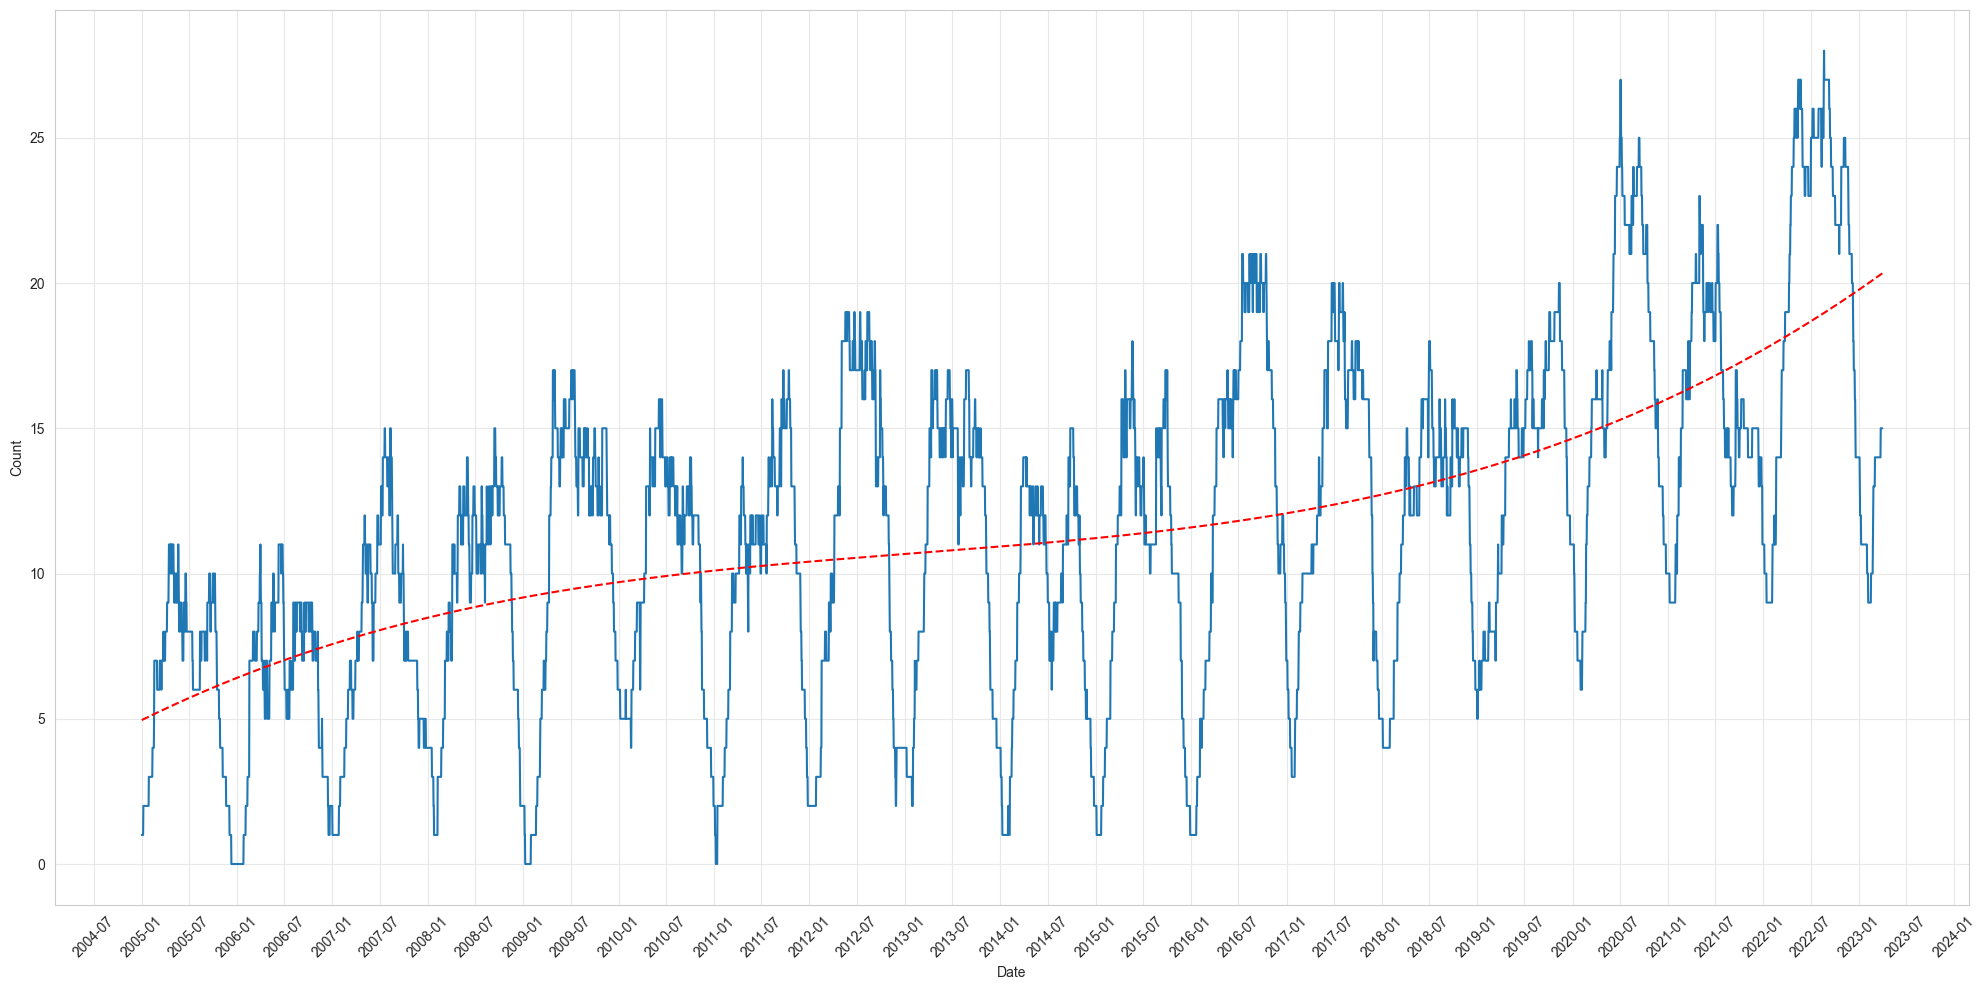

In [6]:
plt.figure(figsize=(20, 10))


ax = sns.lineplot(data=active, y='Count',x=active.index)

x = np.arange(len(active))
y = active['Count'].values
coefficients = np.polyfit(x, y, 3)
trendline = np.poly1d(coefficients)

# Tracer la ligne de tendance
ax.plot(active.index, trendline(x), color='red', linestyle='--', label='Trendline')

ax.xaxis.set_major_locator(mdates.MonthLocator(interval=6))

# Afficher le graphique
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


C:\Users\lambe\AppData\Local\Temp\ipykernel_27448\2999311739.py:13: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  plt.plot(df.index[idx], i, 'ro', markersize=1.1, color='blue')


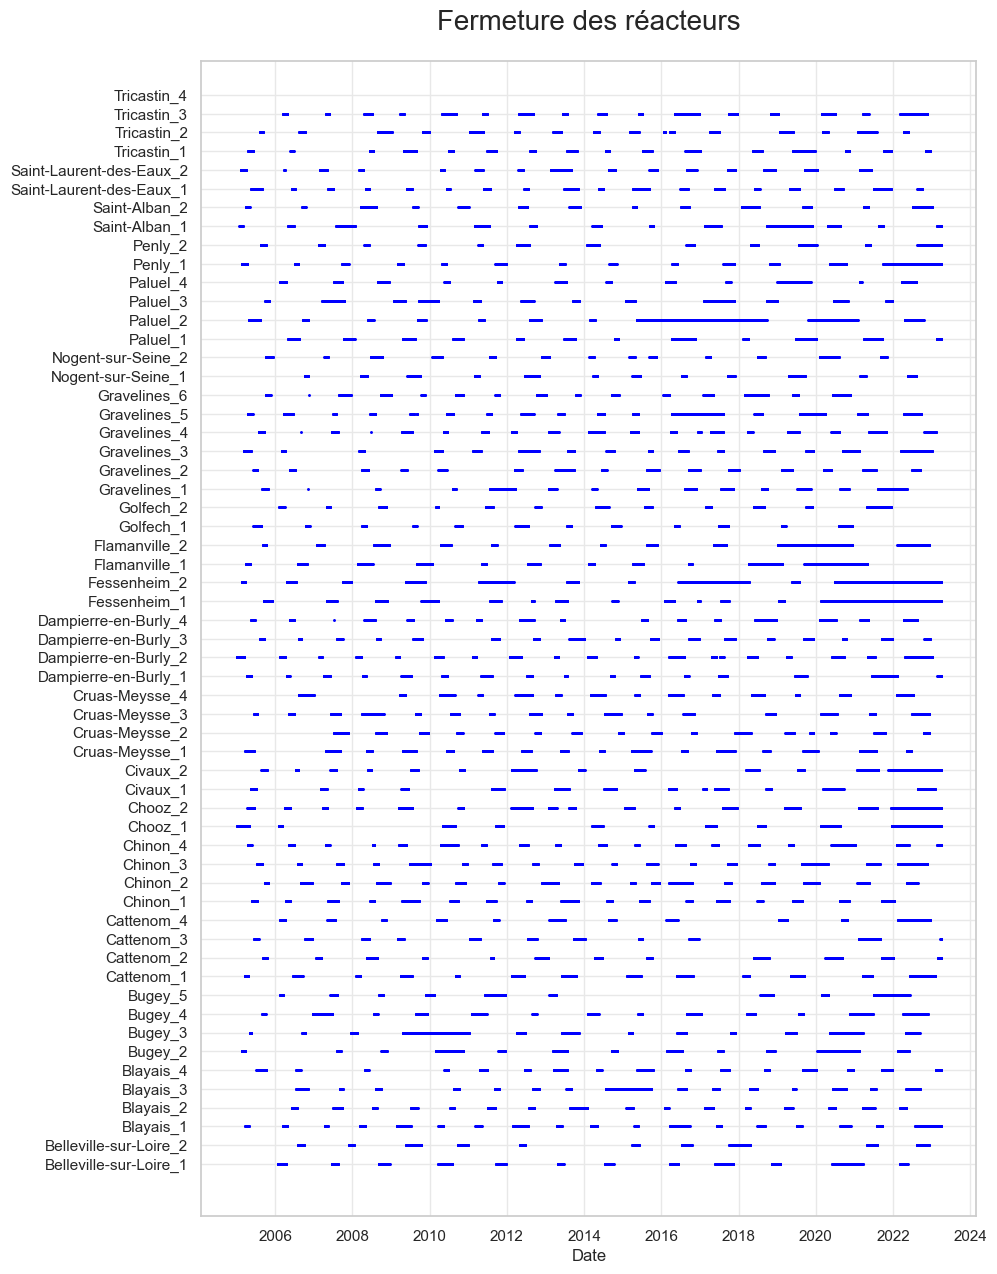

In [7]:
sns.set_context("notebook")

# Exemple de DataFrame
df = active.reindex(sorted(active.columns), axis=1)
df.drop('Count', axis =1, inplace = True)

plt.figure(figsize=(10, 15))
# Créer un graphique pour chaque nom avec des points uniquement lorsque la valeur est False
for i, column in enumerate(df.columns[:-1]):
    #plt.plot(df.index, [i]*len(df.index), 'ro', markersize=1, label=column, alpha=0, color='blue')
    for idx, value in enumerate(df[column]):
        if not value:
            plt.plot(df.index[idx], i, 'ro', markersize=1.1, color='blue')

# Personnalisation du graphique
plt.yticks(range(len(df.columns)), df.columns)
plt.xlabel('Date')
plt.title('Fermeture des réacteurs', fontsize=20, y=1.02)
plt.show()

In [8]:
shutdown[ (shutdown.duration> 360)]['Url']

10          https://www.asn.fr/l-asn-controle/actualites-du-controle/installations-nucleaires/arret-de-reacteurs-de-centrales-nucleaires/arret-pour-visite-decennale-et-rechargement-en-combustible-du-reacteur-1
18              https://www.asn.fr/l-asn-controle/actualites-du-controle/installations-nucleaires/arret-de-reacteurs-de-centrales-nucleaires/arret-pour-maintenance-et-rechargement-du-combustible-du-reacteur-13
20                            https://www.asn.fr/l-asn-controle/actualites-du-controle/installations-nucleaires/arret-de-reacteurs-de-centrales-nucleaires/arret-non-planifie-puis-pour-maintenance-du-reacteur-2
21              https://www.asn.fr/l-asn-controle/actualites-du-controle/installations-nucleaires/arret-de-reacteurs-de-centrales-nucleaires/arret-non-planifie-puis-pour-deuxieme-visite-decennale-du-reacteur-2
25             https://www.asn.fr/l-asn-controle/actualites-du-controle/installations-nucleaires/arret-de-reacteurs-de-centrales-nucleaires/arret-pour-maintenan

In [9]:
shutdown['duration'] = (shutdown.End - shutdown.Start).apply(lambda x: x.days)

C:\Users\lambe\AppData\Local\anaconda3\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1000x2000 with 0 Axes>

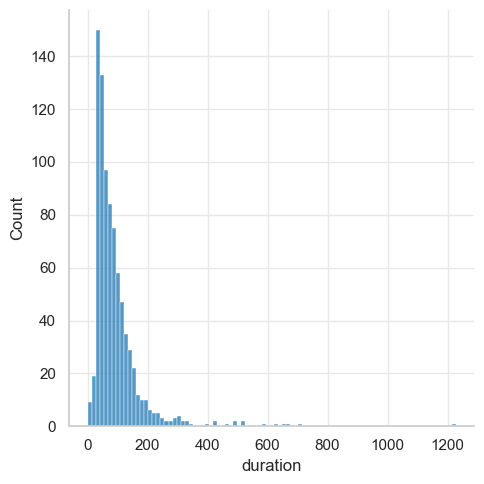

In [10]:
plt.figure(figsize=(10,20))
sns.displot(shutdown, x='duration',label='Distribution de la durée des arrêts')

In [11]:
print('Moyenne :', shutdown['duration'].mean())
shutdown['duration'].describe()

Moyenne : 91.56615017878427


count     839.000000
mean       91.566150
std        88.595768
min         0.000000
25%        44.000000
50%        70.000000
75%       108.000000
max      1227.000000
Name: duration, dtype: float64

In [12]:
shutdown['LDuration'] = (shutdown['duration']> 180)

ts = pd.Series(list(shutdown.LDuration), index=shutdown.Start)

LDuration_per_year = ts.resample('Y').sum()
LDuration_per_year = LDuration_per_year[LDuration_per_year.index < pd.Timestamp(2023, 1, 1)]

ts_duration = pd.Series(list(shutdown.duration), index=shutdown.Start)
ts_duration = ts_duration.resample('Y').mean()
ts_duration = ts_duration[ts_duration.index < pd.Timestamp(2023, 1, 1)]

(0.0, 170.0)

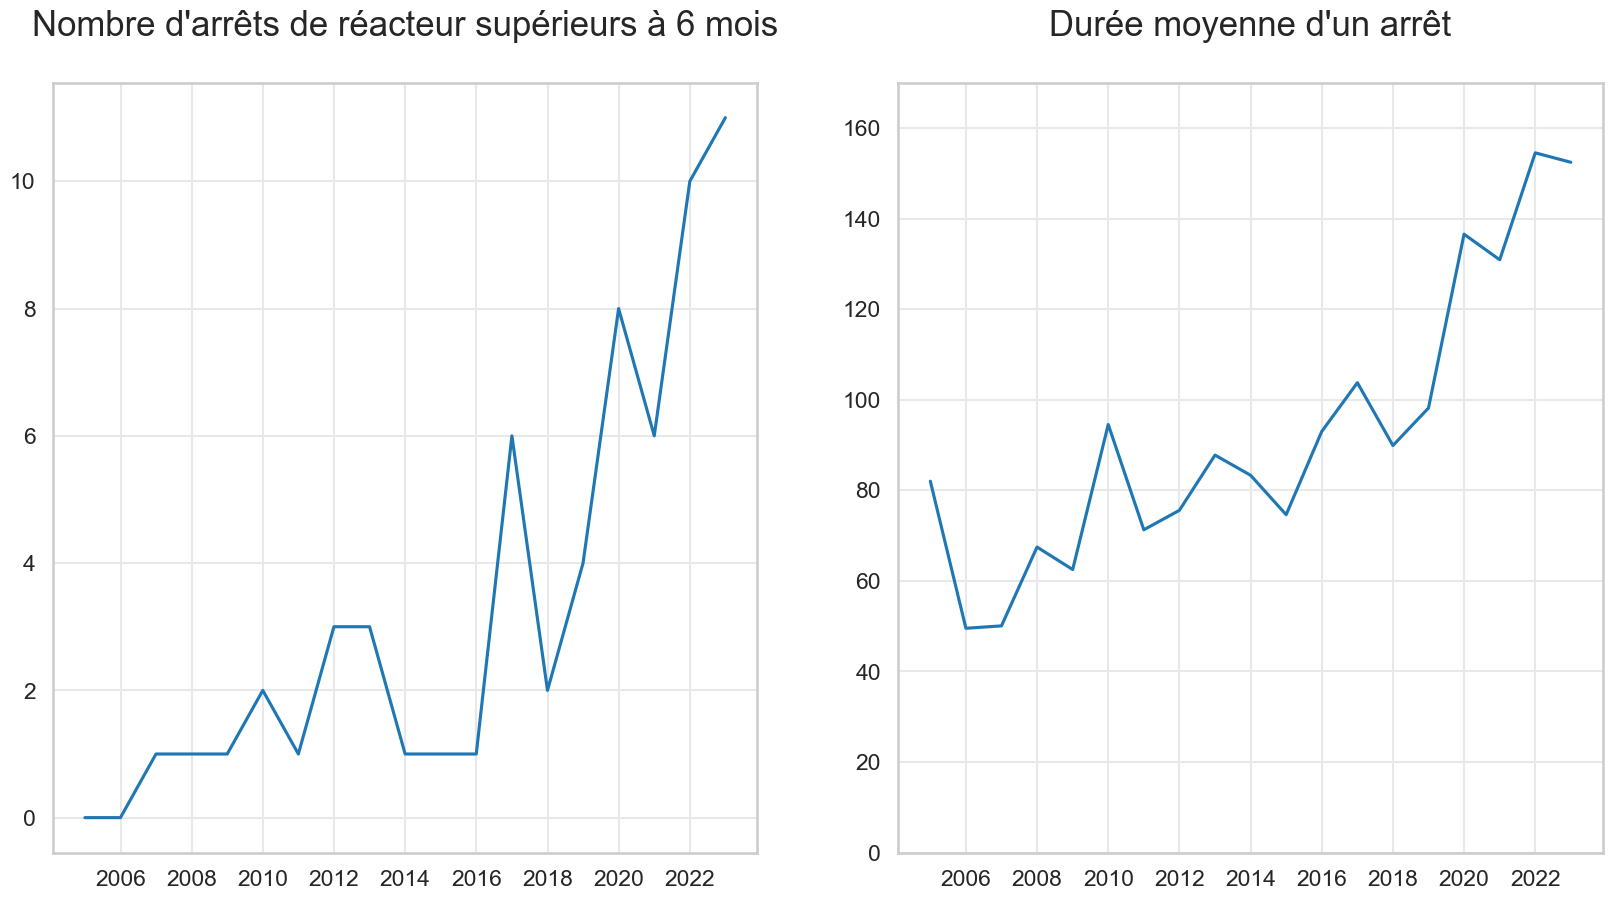

In [13]:
sns.set_context("talk")
fig, ax = plt.subplots(1,2, figsize = (20,10))

sns.lineplot(LDuration_per_year, ax = ax[0])
ax[0].set_title("Nombre d'arrêts de réacteur supérieurs à 6 mois", fontsize=25, y=1.05)
ax[0].set_xlabel("")

sns.lineplot(ts_duration, ax = ax[1])
ax[1].set_title("Durée moyenne d'un arrêt", fontsize=25, y=1.05)
ax[1].set_xlabel("")

plt.ylim([0, 170])

Depuis 2006, le nombre de réacteurs arrêtés pour plus de 6 mois ne fait qu'augmenter, et la durée moyenne d'un arrêt a doublé de 2005 à 2023.
On observe donc une multiplication des arrêts de longue durée, ce qui entraîne une perte en capacité de production d'électricité.
Cette augmentation de la durée des arrêts s'ex

In [14]:
# Créez une série temporelle exemple avec des dates en index
date_rng = pd.date_range(start='2021-01-01', end='2023-12-31', freq='D')
data = [False] * len(date_rng)
ts = pd.Series(data, index=date_rng)

# Utilisez resample pour regrouper par année et compter les valeurs True
true_counts_per_year = ts.resample('Y').sum()

# Affichez le nombre de valeurs True par année
print(true_counts_per_year)

2021-12-31    0
2022-12-31    0
2023-12-31    0
Freq: A-DEC, dtype: int64


In [15]:
power_list = [
                ['Saint-Alban', 1300],
                ['Tricastin', 900],
                ['Blayais', 900],
                ['Chinon', 900],
                ['Cattenom', 1300],
                ['Dampierre-en-Burly', 900],
                ['Cruas-Meysse', 900],
                ['Paluel', 1300],
                ['Penly', 1300],
                ['Nogent-sur-Seine', 1300],
                ['Chooz', 1450],
                ['Civaux', 1450],
                ['Gravelines', 900],
                ['Tricastin', 900],
                ['Flamanville', 1300],
                ['Golfech', 1300],
                ['Fessenheim', 900],
                ['Belleville-sur-Loire', 1300],
                ['Saint-Laurent-des-Eaux', 900],
                ['Bugey', 900]
            ]

power_df = pd.DataFrame(power_list, columns=['Name','Power'])

In [16]:
power = active.copy()
for i in range(len(power_df)):
    power.loc[:,power.columns.str.contains(power_df['Name'][i])] = power.loc[:,power.columns.str.contains(power_df['Name'][i])].replace(True, power_df['Power'][i])
    
power = power.replace(False, 0)

In [17]:
#power[power.sum(axis = 1) == power.sum(axis = 1).max()].iloc[0,:]

In [18]:
power['Total'] = power.iloc[:,:-1].sum(axis=1)
p_mean = power.loc[power.index<pd.Timestamp(2023,1,1),'Total'].resample('Y').mean()

In [19]:
def smoothed(serie, sigma=1):
    sm_serie = serie.copy()
    sm_serie[:] = gaussian_filter1d(sm_serie, sigma=sigma)
    return sm_serie

Text(0, 0.5, '')

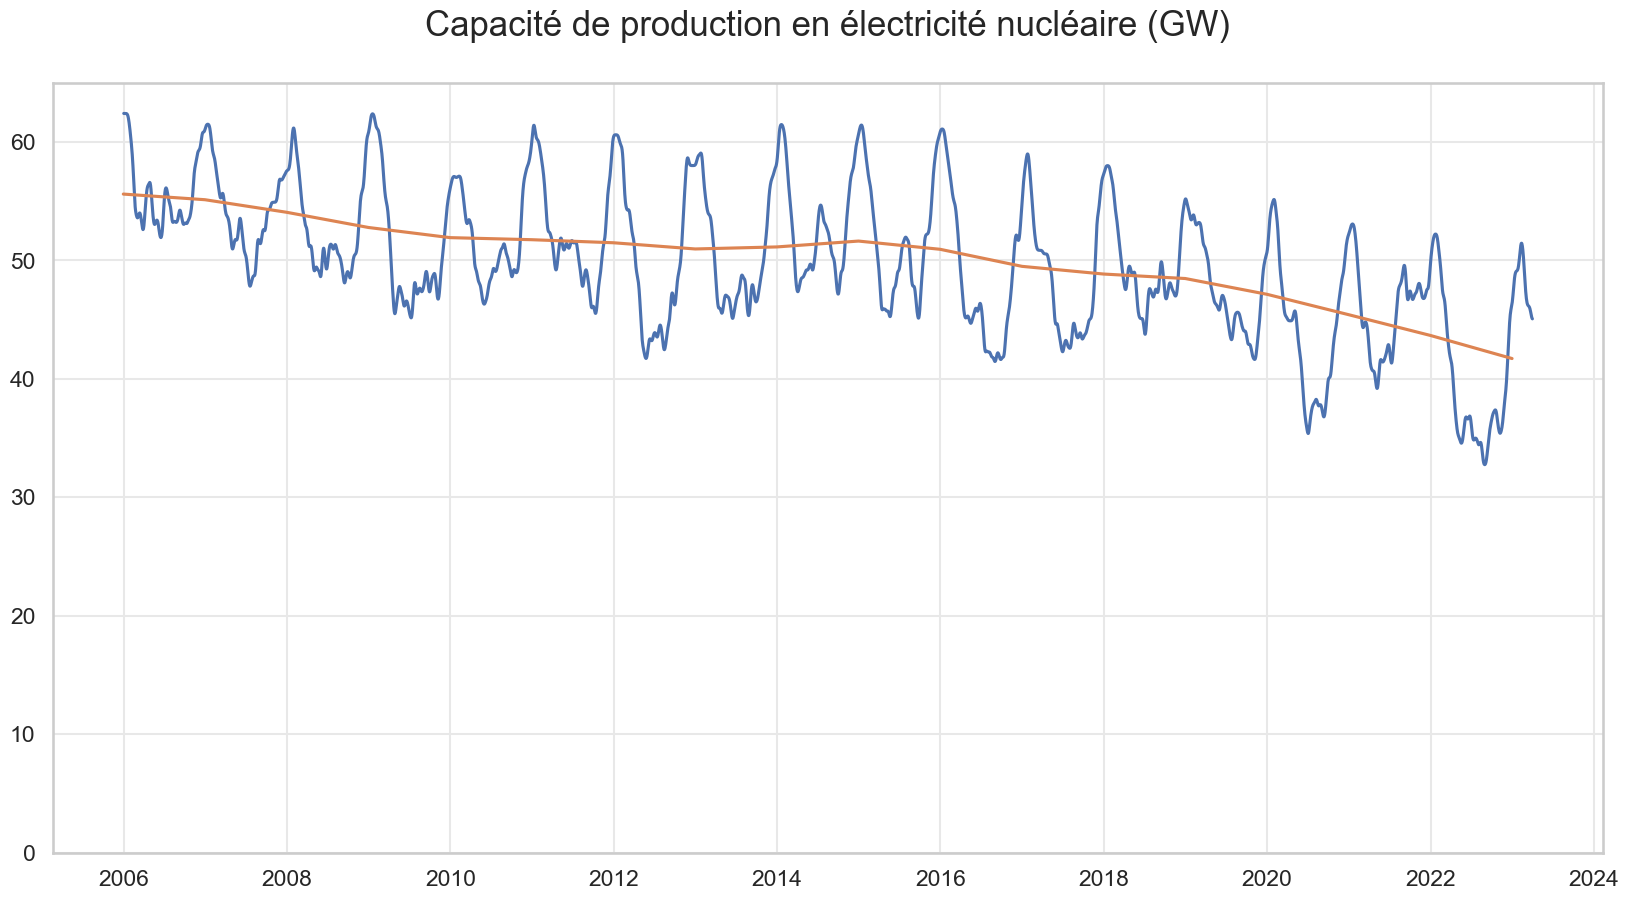

In [41]:
sns.set_context("talk")
fig = plt.figure(figsize = (20, 10))
plt.ylim([0, 65])

sm_capacite = capacite.copy()
sm_capacite[:] = gaussian_filter1d(capacite, sigma=1)

plot = sns.lineplot(smoothed(power['Total'].loc[pd.Timestamp(2006,1,1)<power.index]/1000, sigma=5))
sns.lineplot(smoothed(p_mean/1000, sigma=1))

plot.set_title('Capacité de production en électricité nucléaire (GW)', fontsize=25, y=1.05)
plot.set_xlabel("")
plot.set_ylabel("")


In [21]:
start = pd.Timestamp(2022,1,1)
end = pd.Timestamp(2022,12,31)

spower = power.loc[(start <= power.index) & (power.index <= end),'Total'].resample('M').sum().cumsum()*24/10**6

spower.index = spower.index.strftime('%B-%Y')
spower

Date
January-2022       38.4900
February-2022      71.5932
March-2022        104.4528
April-2022        132.3912
May-2022          158.3484
June-2022         184.8756
July-2022         210.9336
August-2022       236.1408
September-2022    260.9808
October-2022      288.5112
November-2022     314.6328
December-2022     346.6080
Name: Total, dtype: float64

In [42]:
power.loc[(start <= power.index) & (power.index <= end),'Total']*24/10**6


Date
2022-01-01    1.2012
2022-01-02    1.2012
2022-01-03    1.2012
2022-01-04    1.2012
2022-01-05    1.2324
               ...  
2022-12-27    1.1040
2022-12-28    1.1040
2022-12-29    1.1040
2022-12-30    1.1040
2022-12-31    1.1040
Name: Total, Length: 365, dtype: float64

In [43]:
energie = pd.read_csv('Energie.csv',sep=';',index_col='Période')
energie = energie.drop('PERIODE')
energie = energie.replace('secret', np.nan)
energie = energie.astype('float')

energie.index = pd.to_datetime(energie.index)

In [44]:
column_mapping = {
    "Production totale brute d'électricité (en GWh)": "Production_totale_brute",
    "Production totale nette d'électricité (en GWh)": "Production_totale_nette",
    "Production brute d'électricité nucléaire (en GWh)": "Production_brute_nucléaire",
    "Production nette d'électricité nucléaire (en GWh)": "Production_nette_nucléaire",
    "Production brute d'électricité hydraulique (en GWh)": "Production_brute_hydraulique",
    "Production nette d'électricité hydraulique (en GWh)": "Production_nette_hydraulique",
    "Production brute d'électricité éolienne (en GWh)": "Production_brute_eolienne",
    "Production nette d'électricité éolienne (en GWh)": "Production_nette_eolienne",
    "Production brute d'électricité photovoltaïque (en GWh)": "Production_brute_photovoltaïque",
    "Production nette d'électricité photovoltaïque (en GWh)": "Production_nette_photovoltaïque",
    "Production brute d'électricité thermique (en GWh)": "Production_brute_thermique",
    "Production nette d'électricité thermique (en GWh)": "Production_nette_thermique",
    'Électricité absorbée pour les pompages (en GWh)': "Electricite_absorbée_pompages",
    "Total des importations physiques d'électricité (en GWh)": "Importations_physiques_electricite",
    "Total des exportations physiques d'électricité (en GWh)": "Exportations_physiques_electricite",
    "Consommation d'électricité (hors pertes) CVS-CVC-CJO (en GWh)":"Consommation_totale",
    "Solde\xa0des\xa0échanges\xa0physiques\xa0d'électricité (en GWh)":"Solde_echanges"
}


energie.rename(columns=column_mapping, inplace=True)
energie["Production_nette_renouvelable"] = energie[["Production_nette_photovoltaïque",
                                                                "Production_nette_eolienne",
                                                                "Production_nette_hydraulique"]].sum(axis=1)
energie_pourcentage = energie.div(energie['Production_totale_nette'], axis=0)
pow_gw = power['Total'].resample('M').sum()*24/10**3
pow_gw.index = pow_gw.index.map(lambda x: x.replace(day=1))
pow_gw = pow_gw.rename('Capacité_nucléaire_maximale')

energie = energie.join(pow_gw, how='outer')
energie_short = energie.iloc[:,:29]
energie["Consommation_nette"] = energie.Production_totale_nette + energie.Importations_physiques_electricite - energie.Exportations_physiques_electricite

In [45]:
list(energie.columns)

['Production_totale_brute',
 'Production_totale_nette',
 'Production_brute_nucléaire',
 'Production_nette_nucléaire',
 'Production_brute_hydraulique',
 'Production_nette_hydraulique',
 'Production_brute_eolienne',
 'Production_nette_eolienne',
 'Production_brute_photovoltaïque',
 'Production_nette_photovoltaïque',
 'Production_brute_thermique',
 'Production_nette_thermique',
 'Electricite_absorbée_pompages',
 'Importations_physiques_electricite',
 'Exportations_physiques_electricite',
 'Energie appelée réelle yc pertes (consommation calculée yc pertes) (en GWh)',
 'Livraisons en basse tension (BT : FC + Corse) (en GWh)',
 'Livraisons en moyenne tension (MT : FC + Corse) (en GWh)',
 'Livraisons en haute tension (en GWh)',
 'Puissance maximale appelée (en GW)',
 'Solde_echanges',
 "Consommation d'électricité (hors pertes) CVC-CJO (en GWh)",
 'Livraisons en basse tension CVC-CJO (en GWh)',
 'Livraisons en moyenne tension CVC-CJO (en GWh)',
 'Livraisons en haute tension CVC-CJO (en GWh)',


Text(0.5, 1.05, '')

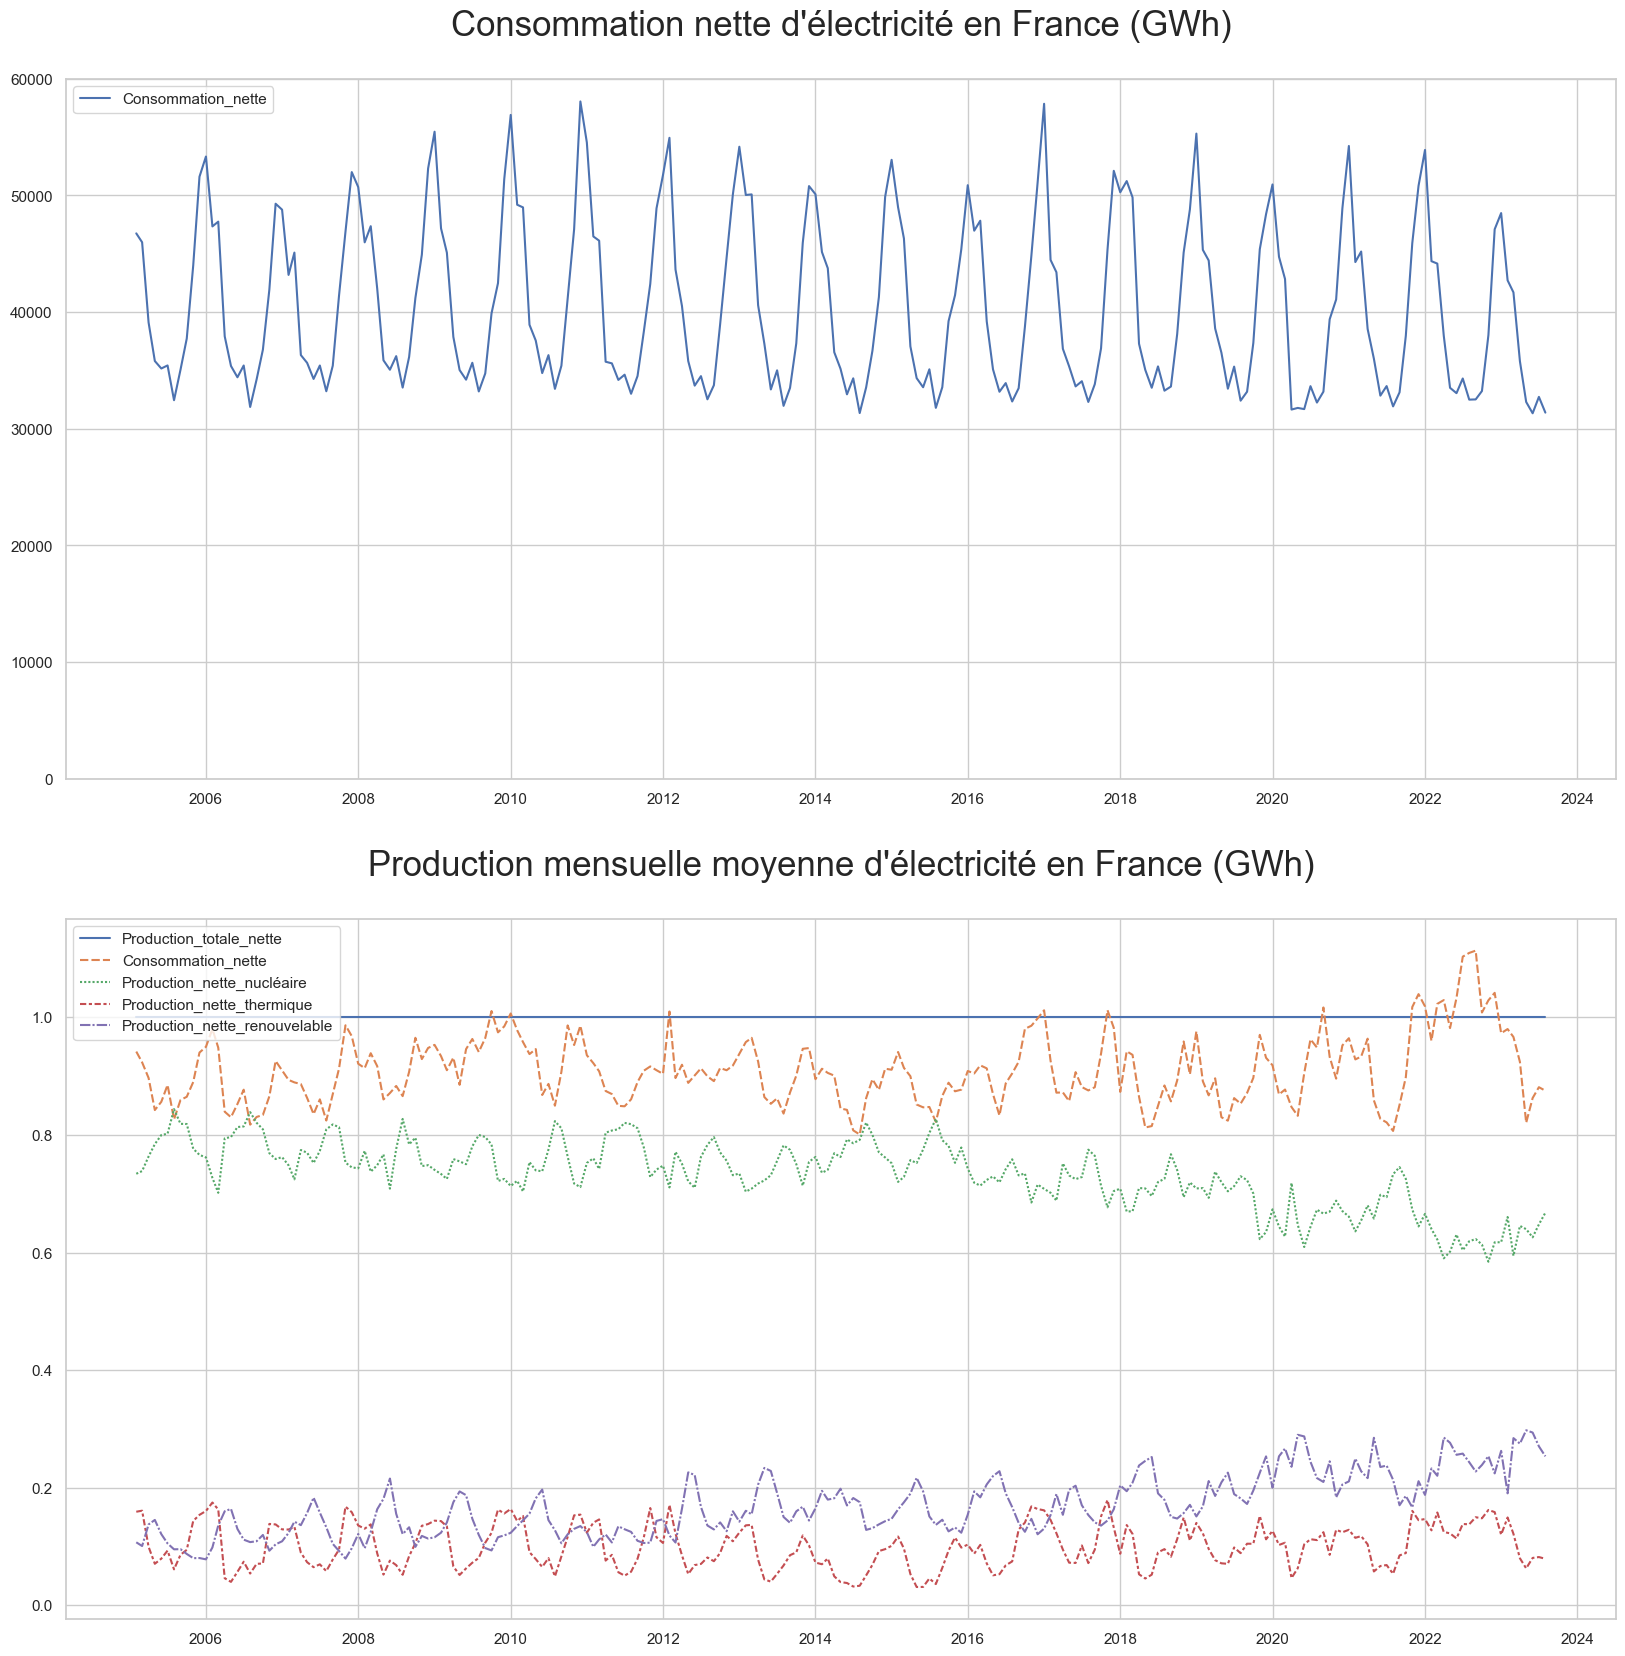

In [116]:
fig, ax = plt.subplots(2,1, figsize = (20,20))
sns.lineplot(energie.loc[energie.index > pd.Timestamp(2005,1,1),
                              ['Consommation_nette'                               
]], ax=ax[0])

ax[0].set_ylim([0, 60000]) 

sns.lineplot(energie.loc[energie.index > pd.Timestamp(2005,1,1),
                              ['Production_totale_nette',
                                'Consommation_nette',
                               'Production_nette_nucléaire',
                               'Production_nette_thermique',
                               'Production_nette_renouvelable'                            
]].div(energie['Production_totale_nette'],axis=0), ax = ax[1])
sns.move_legend(ax[0], "upper left", bbox_to_anchor=(0, 1))
sns.move_legend(ax[1], "upper left", bbox_to_anchor=(0, 1))

ax[0].set_title("Consommation nette d'électricité en France (GWh)", fontsize=25, y=1.05)
ax[0].set_xlabel("", fontsize=25, y=1.05)

ax[1].set_title("Production mensuelle moyenne d'électricité en France (GWh)", fontsize=25, y=1.05)
ax[1].set_xlabel("", fontsize=25, y=1.05)

La part du nucléaire dans la production d'électricité française est en baisse depuis 2014. Cette diminution de production d'énergie nucléaire est compensé par l'augmentation de la production d'énergie renouvelable en France, qui est dûe à l'énergie éolienne ainsi que solaire. L'énergie hydraulique reste constante, en effet la plus des emplacements de barrages sont déjà pourvus en France.

La production d'énergie renouvelable est supérieure en hiver qu'en été car l'énergie hydrolienne reste stockée dans les barrages en prévisions de la hausses des consommations d'hiver.

On peut voir que la part d'énergie thermique reste constante égale à environ 10% de la production électrique, 

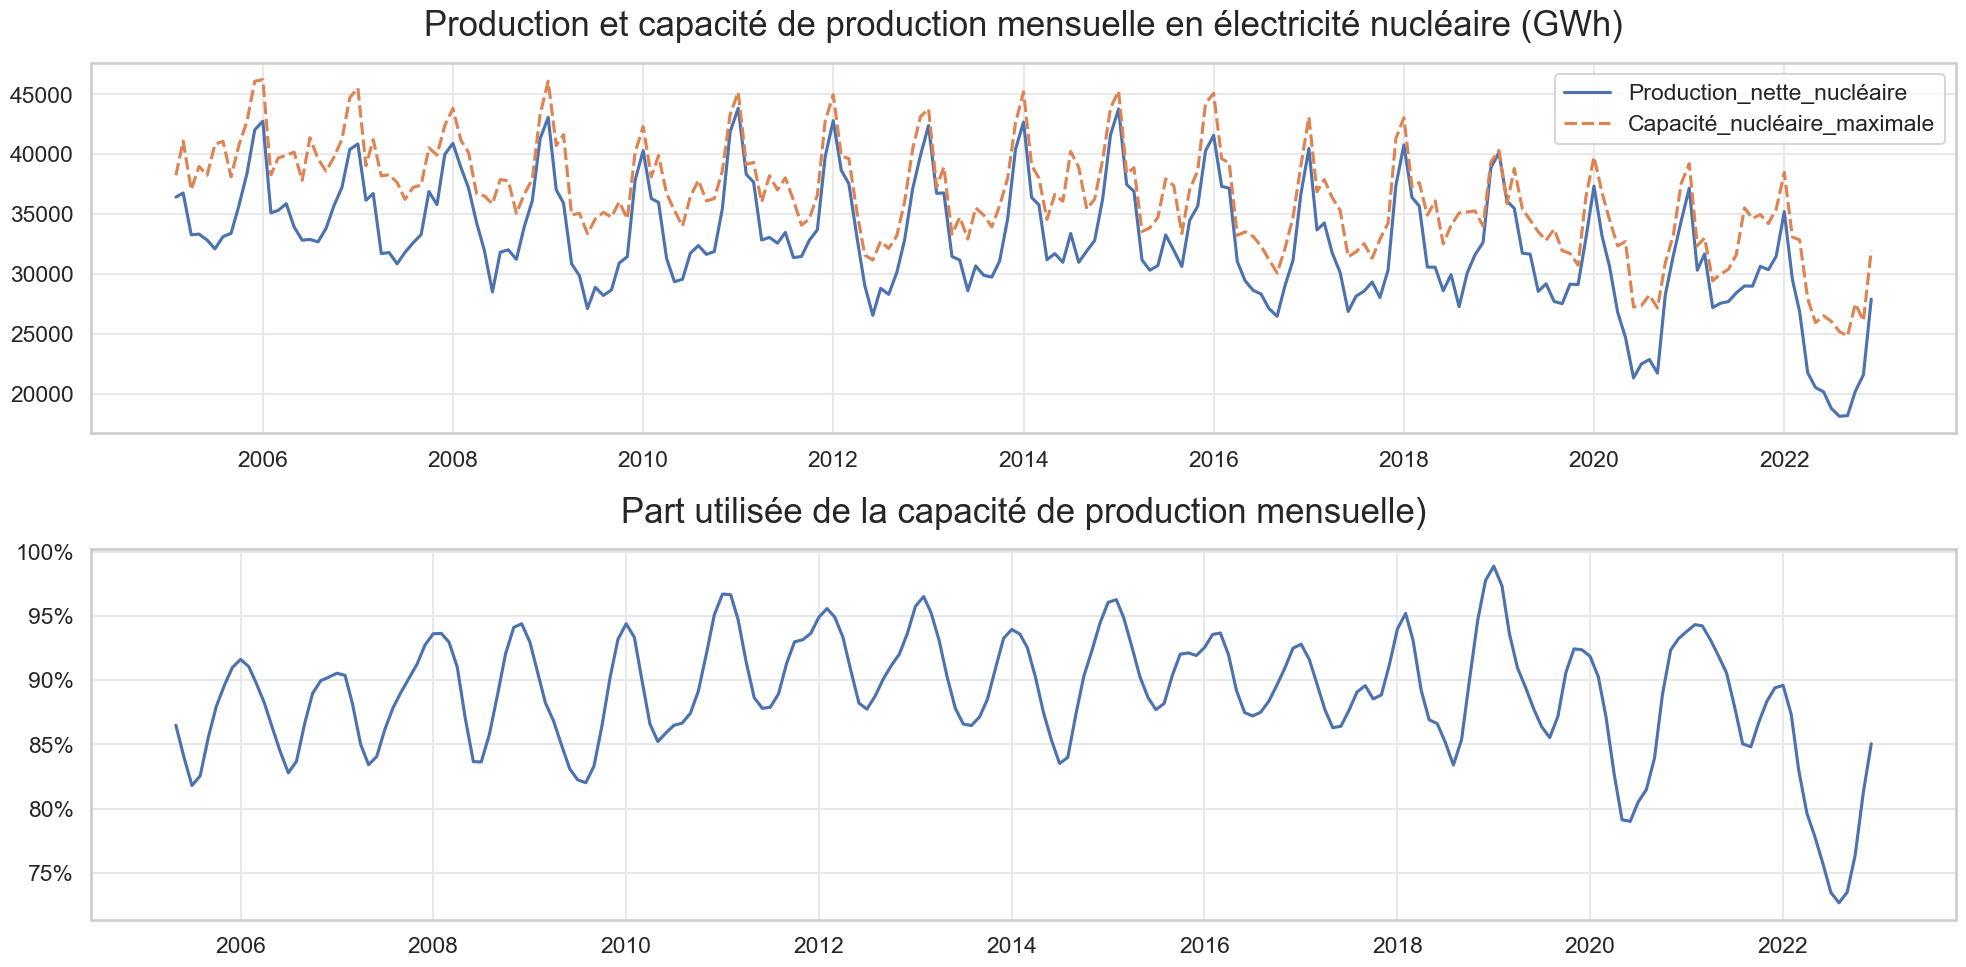

In [47]:
fig, ax = plt.subplots(2, 1, figsize=(20,10))
sns.lineplot(energie.loc[(energie.index > pd.Timestamp(2005,1,1))&(energie.index < pd.Timestamp(2023,1,1)),
                              ['Production_nette_nucléaire',
                               'Capacité_nucléaire_maximale',                              
]], ax = ax[0])

capacite = energie_short['Production_nette_nucléaire'].div(energie['Capacité_nucléaire_maximale'])

sns.lineplot(smoothed(capacite[sm_capacite.index < pd.Timestamp(2023,1,1)],sigma=1), ax=ax[1])

ax[1].yaxis.set_major_formatter(mtick.PercentFormatter(1.0, decimals=0))  # Utilisez 1.0 comme base (100%) et ajustez les décimales

ax[0].set_title("Production et capacité de production mensuelle en électricité nucléaire (GWh)", fontsize=25, y = 1.05)
ax[1].set_title("Part utilisée de la capacité de production mensuelle)", fontsize=25, y = 1.05)
plt.tight_layout()
plt.show()


<Axes: >

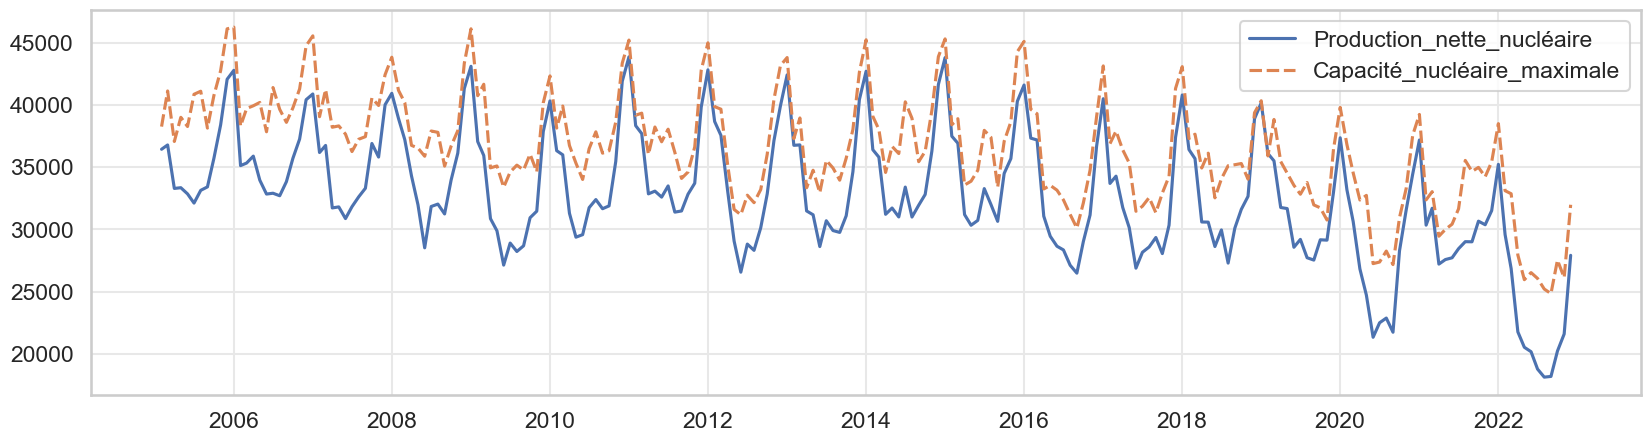

In [48]:
plt.figure(figsize=(20,5))
sns.lineplot(energie.loc[(energie.index > pd.Timestamp(2005,1,1))&(energie.index < pd.Timestamp(2023,1,1)),
                              ['Production_nette_nucléaire',
                               'Capacité_nucléaire_maximale',                              
]])


In [49]:
sm_capacite = capacite.copy()
sm_capacite[:] = gaussian_filter1d(capacite, sigma=1)

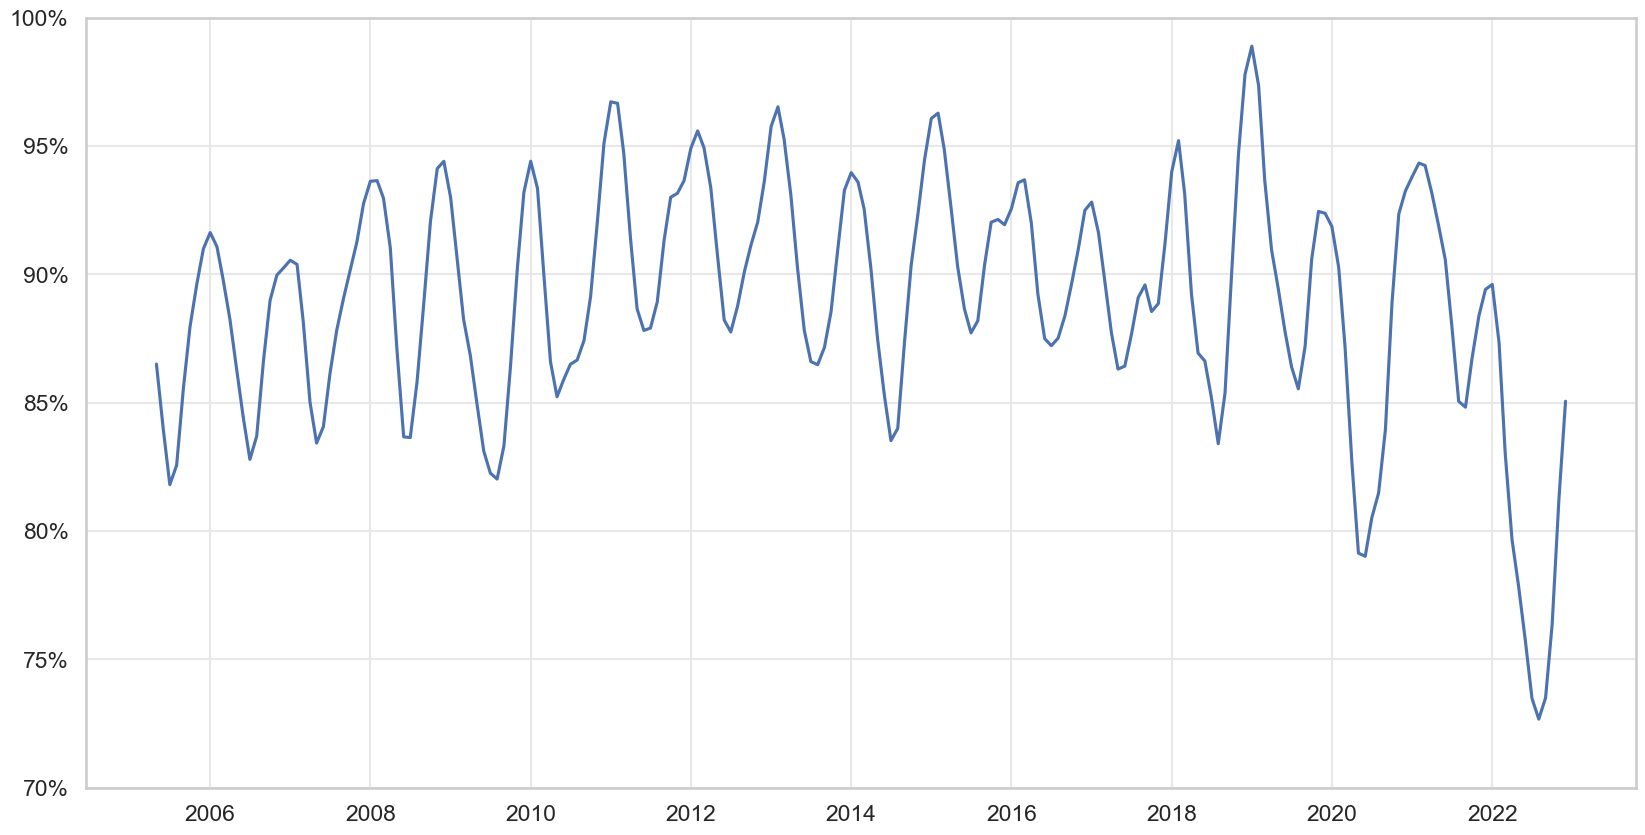

In [50]:
plt.figure(figsize=(20,10))
plt.ylim([0.7,1])
capacite = energie_short['Production_nette_nucléaire'].div(energie['Capacité_nucléaire_maximale'])

sns.lineplot(smoothed(capacite[sm_capacite.index < pd.Timestamp(2023,1,1)],sigma=1))

ax = plt.gca()
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0, decimals=0))  # Utilisez 1.0 comme base (100%) et ajustez les décimales

# Afficher le graphique
plt.show()

In [51]:
energie_short['Somme'] = energie_short[['Production_nette_nucléaire',
       'Production_nette_hydraulique', 'Production_nette_eolienne',
       'Production_nette_photovoltaïque', 'Production_nette_thermique']].sum(axis=1)

In [52]:
energie_short.columns

Index(['Production_totale_brute', 'Production_totale_nette',
       'Production_brute_nucléaire', 'Production_nette_nucléaire',
       'Production_brute_hydraulique', 'Production_nette_hydraulique',
       'Production_brute_eolienne', 'Production_nette_eolienne',
       'Production_brute_photovoltaïque', 'Production_nette_photovoltaïque',
       'Production_brute_thermique', 'Production_nette_thermique',
       'Electricite_absorbée_pompages', 'Importations_physiques_electricite',
       'Exportations_physiques_electricite',
       'Energie appelée réelle yc pertes (consommation calculée yc pertes) (en GWh)',
       'Livraisons en basse tension (BT : FC + Corse) (en GWh)',
       'Livraisons en moyenne tension (MT : FC + Corse) (en GWh)',
       'Livraisons en haute tension (en GWh)',
       'Puissance maximale appelée (en GW)', 'Solde_echanges',
       'Consommation d'électricité (hors pertes) CVC-CJO (en GWh)',
       'Livraisons en basse tension CVC-CJO (en GWh)',
       'Livraisons

In [53]:
energie_nette = energie_short.loc[:,energie_short.columns.str.contains('nette')]
energie_brute = energie_short.loc[:,energie_short.columns.str.contains('brute')]

In [54]:
energie_nette.columns

Index(['Production_totale_nette', 'Production_nette_nucléaire',
       'Production_nette_hydraulique', 'Production_nette_eolienne',
       'Production_nette_photovoltaïque', 'Production_nette_thermique'],
      dtype='object')

In [55]:
url = "https://fr.wikipedia.org/wiki/Liste_des_r%C3%A9acteurs_nucl%C3%A9aires_en_France"
response = requests.get(url)

In [56]:
centrale_info = pd.read_html(response.content)[0]

In [57]:
def remove_brackets(column_name):
    return re.sub(r'\s*\[.*\]', '', column_name)

centrale_info.columns = centrale_info.columns.str.replace(" ","_").map(remove_brackets)

In [58]:
nom_reacteur = pd.Series(['Belleville-sur-Loire_1',
 'Belleville-sur-Loire_2',
 'Blayais_1',
 'Blayais_2',
 'Blayais_3',
 'Blayais_4',
 'Bugey_2',
 'Bugey_3',
 'Bugey_4',
 'Bugey_5',
 'Cattenom_1',
 'Cattenom_2',
 'Cattenom_3',
 'Cattenom_4',
 'Chinon_1',
 'Chinon_2',
 'Chinon_3',
 'Chinon_4',
 'Chooz_1',
 'Chooz_2',
 'Civaux_1',
 'Civaux_2',
 'Cruas-Meysse_1',
 'Cruas-Meysse_2',
 'Cruas-Meysse_3',
 'Cruas-Meysse_4',
 'Dampierre-en-Burly_1',
 'Dampierre-en-Burly_2',
 'Dampierre-en-Burly_3',
 'Dampierre-en-Burly_4',
 'Flamanville_1',
 'Flamanville_2',
 'Golfech_1',
 'Golfech_2',
 'Gravelines_1',
 'Gravelines_2',
 'Gravelines_3',
 'Gravelines_4',
 'Gravelines_5',
 'Gravelines_6',
 'Nogent-sur-Seine_1',
 'Nogent-sur-Seine_2',
 'Paluel_1',
 'Paluel_2',
 'Paluel_3',
 'Paluel_4',
 'Penly_1',
 'Penly_2',
 'Saint-Alban_1',
 'Saint-Alban_2',
 'Saint-Laurent-des-Eaux_1',
 'Saint-Laurent-des-Eaux_2',
 'Tricastin_1',
 'Tricastin_2',
 'Tricastin_3',
 'Tricastin_4'])

centrale_info['Nom_du_réacteur'] = nom_reacteur

In [59]:
centrale_info.loc[:,['Début_constr.', '1er_raccord._au_réseau', 'Mise_en_service_comm.']] = centrale_info.loc[:,['Début_constr.', '1er_raccord._au_réseau', 'Mise_en_service_comm.']].apply(pd.to_datetime, format='%Y')

In [70]:
centrale_info['Age'] = (pd.datetime.now()-centrale_info.loc[:,[ '1er_raccord._au_réseau']]).iloc[:,0].apply(lambda x: int(x.days //365.25))

C:\Users\lambe\AppData\Local\Temp\ipykernel_27448\891052390.py:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  centrale_info['Age'] = (pd.datetime.now()-centrale_info.loc[:,[ '1er_raccord._au_réseau']]).iloc[:,0].apply(lambda x: int(x.days //365.25))


In [71]:
centrale_info

,Centrale_nucléaire,Nom_du_réacteur,Palier,Puissance_therm._(MWt),Puissance_nette_(MWe),Début_constr.,1er_raccord._au_réseau,Mise_en_service_comm.,Arrêt_définitif_prévu,Source_froide,Age
0,Belleville,Belleville-sur-Loire_1,P'4,3 817,1 310,1980-01-01,1987-01-01,1988-01-01,NaN,TAR[b],36
1,Belleville,Belleville-sur-Loire_2,P'4,3 817,1 310,1980-01-01,1988-01-01,1989-01-01,NaN,TAR,35
2,Blayais,Blayais_1,CP1,2 785,910,1977-01-01,1981-01-01,1981-01-01,2029-2035,Gironde,42
3,Blayais,Blayais_2,CP1,2 785,910,1977-01-01,1982-01-01,1983-01-01,2029-2035,Gironde,41
4,Blayais,Blayais_3,CP1,2 785,910,1978-01-01,1983-01-01,1983-01-01,NaN,Gironde,40
5,Blayais,Blayais_4,CP1,2 785,910,1978-01-01,1983-01-01,1983-01-01,NaN,Gironde,40
6,Bugey,Bugey_2,CP0,2 785,910,1972-01-01,1978-01-01,1979-01-01,2029-2035,Rhône,45
7,Bugey,Bugey_3,CP0,2 785,910,1973-01-01,1978-01-01,1979-01-01,2029-2035,Rhône,45
8,Bugey,Bugey_4,CP0,2 785,880,1974-01-01,1979-01-01,1979-01-01,NaN,TARx2,44
9,Bugey,Bugey_5,CP0,2 785,880,1974-01-01,1979-01-01,1980-01-01,NaN,TARx2,44


In [107]:
# Créez des catégories d'âge par tranches de 5 ans
bins = range(25, 50, 5)
labels = [f"{i}-{i+4}" for i in bins[:-1]]
P_age = centrale_info.copy()
P_age['Puissance_nette_(MWe)'] = P_age['Puissance_nette_(MWe)'].str.replace('\xa0','').str.replace(' ','').astype(int)

# Utilisez pd.cut pour créer des catégories d'âge
P_age.index = pd.cut(P_age.Age, bins=bins, labels=labels)
result = P_age.groupby(P_age.index)['Puissance_nette_(MWe)'].sum()

cap = result / result.sum()

In [103]:
result

Age
25-29     6000
30-34     9000
35-39    26000
40-44    19000
Name: Puissance_nette_(MWe), dtype: int64

Text(0.5, 0, "Tranche d'age")

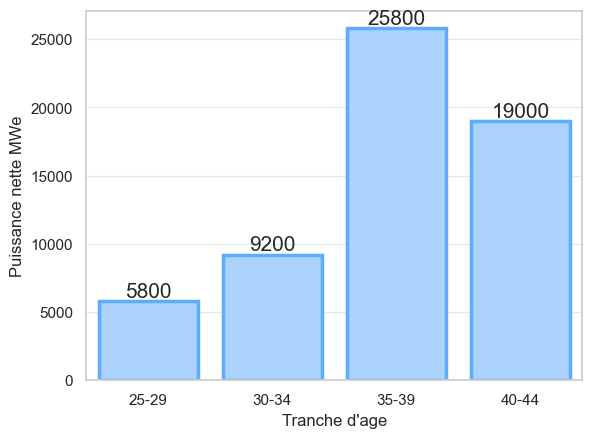

In [106]:
sns.set(style="whitegrid", rc=custom_style)


ax = sns.barplot(x=result.index, y=result.apply(lambda x: round(x, -2)), facecolor="#aad2fa", linewidth=2.5, edgecolor="#5cadff")
ax.bar_label(ax.containers[0], fontsize=15)
ax.set_ylabel("Puissance nette MWe")
ax.set_xlabel("Tranche d'age")

Text(0.5, 0, "Tranche d'age")

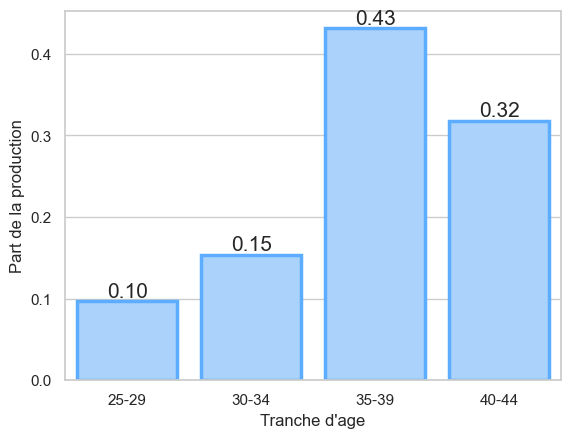

In [121]:
sns.set(style="whitegrid")

ax = sns.barplot(x=cap.index, y=cap,facecolor="#aad2fa",linewidth=2.5, edgecolor="#5cadff")
ax.bar_label(ax.containers[0], fontsize=15, fmt='%.2f')
ax.set_ylabel("Part de la production")
ax.set_xlabel("Tranche d'age")

In [ ]:
centrale_info.groupby('Age').sum()